In [31]:
import numpy as np
import time
import matplotlib.pyplot as plt
import sympy as sp

1.抽样

In [32]:
np.random.seed(int(time.time()))
samples=np.random.normal(0,1,100)
print(samples)

[ 1.46578841  0.03442567  0.43135747 -0.48805037 -1.3995918   1.06576739
 -0.62369073 -0.13021192  1.12342915 -0.31589678 -2.03089849  1.38687779
  0.88133814 -0.38860207  0.59784403  1.60074985 -0.28121494  0.16430727
 -0.42302731 -0.21442072 -0.5855105   1.46820568  2.04081118 -1.25779884
 -1.12787685 -1.38118239 -0.51473776 -1.19005504 -1.49889941 -2.44513129
 -0.86396613  2.06570614  0.81710508 -0.45380059  0.67133939  1.04666943
  0.77570687 -0.59666485  1.4140345  -1.34369541 -0.04057643  0.94317798
  0.48807119  1.27809728 -1.98370437  1.41052005  0.00318793 -1.47729675
  0.42678082  2.02710465  1.36060639  0.4242934   0.15506537  0.8436835
  0.47169133  2.10385591 -0.03468226 -1.06851205 -0.1052311   0.39147226
  0.86144064  0.41676004  0.31970846  1.20319653  0.13122454 -1.37652827
 -0.46590443 -0.60332304  0.95074488 -0.78278506 -2.67031846 -2.12203174
 -1.55340797  0.32331816  0.74935277 -0.98626437 -1.47802427 -0.23323337
  0.89476643 -0.03649683  0.5649126   0.78996957  1.

2.绘图

(array([ 4.,  4.,  9.,  7., 12., 17., 16., 14., 12.,  5.]),
 array([-2.67031846, -2.19290103, -1.71548359, -1.23806615, -0.76064872,
        -0.28323128,  0.19418616,  0.67160359,  1.14902103,  1.62643847,
         2.10385591]),
 <BarContainer object of 10 artists>)

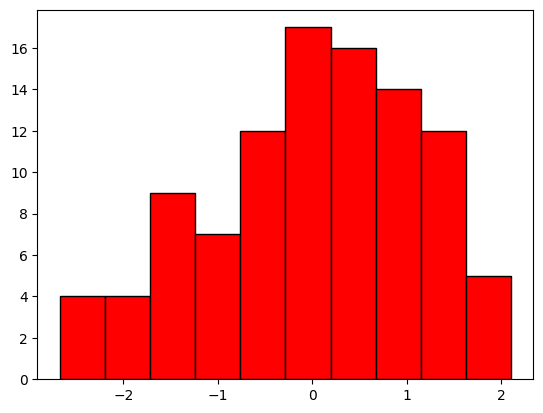

In [33]:
plt.hist(samples,bins=10,color='r',edgecolor='black')

3.计算特征值和特征向量

In [34]:
matrix=np.array([[2,1],[4,5]])
values,vectors=np.linalg.eig(matrix)
print("特征值：",values)
print("特征向量：\n",vectors)

特征值： [1. 6.]
特征向量：
 [[-0.70710678 -0.24253563]
 [ 0.70710678 -0.9701425 ]]


5.协方差矩阵：

In [35]:
matrix2=np.array([[1,2,3],[1,-1,4],[2,1,3],[1,3,-1]])
cov_matrix=np.cov(matrix2)
print(cov_matrix)

[[ 1.          1.5         0.5        -1.        ]
 [ 1.5         6.33333333  2.5        -5.        ]
 [ 0.5         2.5         1.         -2.        ]
 [-1.         -5.         -2.          4.        ]]


$f(x) = 0.25(x-0.5)^2+1$ 局部最小值，使用梯度下降方法

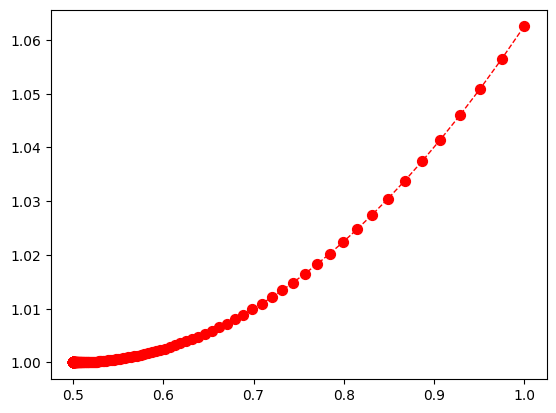

局部最小值点 x=0.5000018345506001
局部最小值：0.25*(x - 0.5)**2 + 1


In [36]:

x=sp.symbols('x')
f=0.25*(x-0.5)**2+1
f_func=sp.lambdify(x,f,'numpy')
f_prime=f.diff(x)
f_prime_func=sp.lambdify(x,f_prime,'numpy')
x_0=1
alpha=0.1
max_iter=1000
epsilon=1e-7
x=x_0
points=[x_0]

for i in range(max_iter):
    gradient=f_prime_func(x)
    new_x = x-alpha*gradient
    
    if abs(new_x-x)<epsilon:
        break
    
    points.append(new_x)
    x = new_x
    
x_range = np.linspace(-2, 4, 400)
y_range = f_func(x_range)

plt.scatter(points, [f_func(x) for x in points], color='red', s=50, zorder=5)
plt.plot(points, [f_func(x) for x in points], 'r--', linewidth=1, zorder=4)
plt.show()

print('局部最小值点 x={}'.format(new_x))
print('局部最小值：{}'.format(f.subs(x,new_x)))

